In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df = pd.read_csv('/content/Unemployment in India.csv')

In [48]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [49]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std          

In [50]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [54]:
df[' Date'] = pd.to_datetime(df[' Date'])

<ipython-input-54-6d17cce9d451>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [51]:
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values or drop rows with missing data (based on analysis)
df.dropna(inplace=True)



Missing Values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [53]:
region_summary = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print("\nAverage Unemployment Rate by Region:")
print(region_summary)



Average Unemployment Rate by Region:
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name:  Estimated Unemployment Rate (%), dtype: float64


In [58]:
time_trend = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean()
print("\nUnemployment Rate Over Time:")
print(time_trend)


Unemployment Rate Over Time:
 Date
2019-05-31     8.874259
2019-06-30     9.303333
2019-07-31     9.033889
2019-08-31     9.637925
2019-09-30     9.051731
2019-10-31     9.900909
2019-11-30     9.868364
2019-12-31     9.497358
2020-01-31     9.950755
2020-02-29     9.964717
2020-03-31    10.700577
2020-04-30    23.641569
2020-05-31    24.875294
2020-06-30    11.903600
Name:  Estimated Unemployment Rate (%), dtype: float64


<ipython-input-60-ca727f43bf59>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df, ci=None)


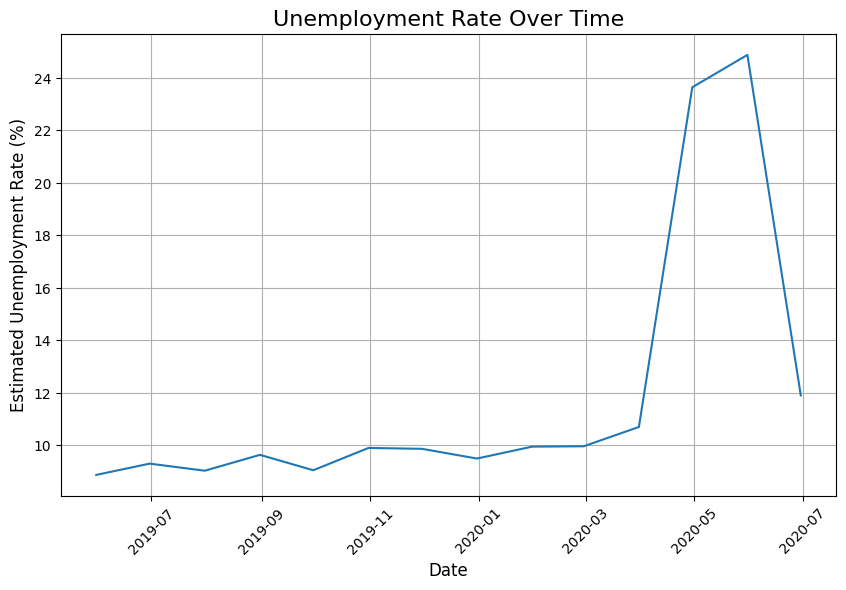

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df, ci=None)
plt.title('Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

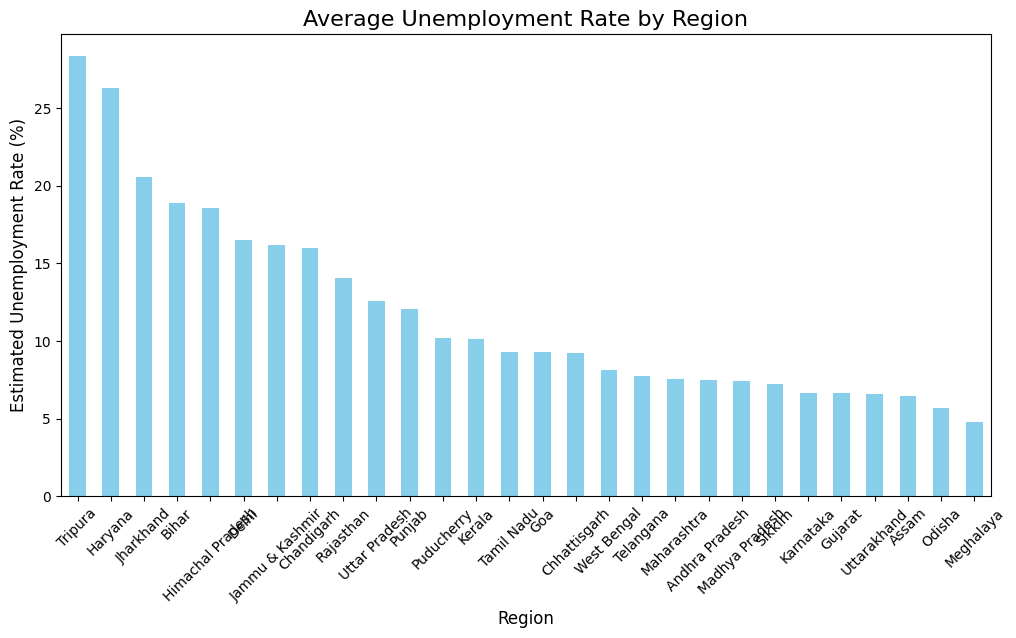

In [61]:
plt.figure(figsize=(12, 6))
region_summary.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

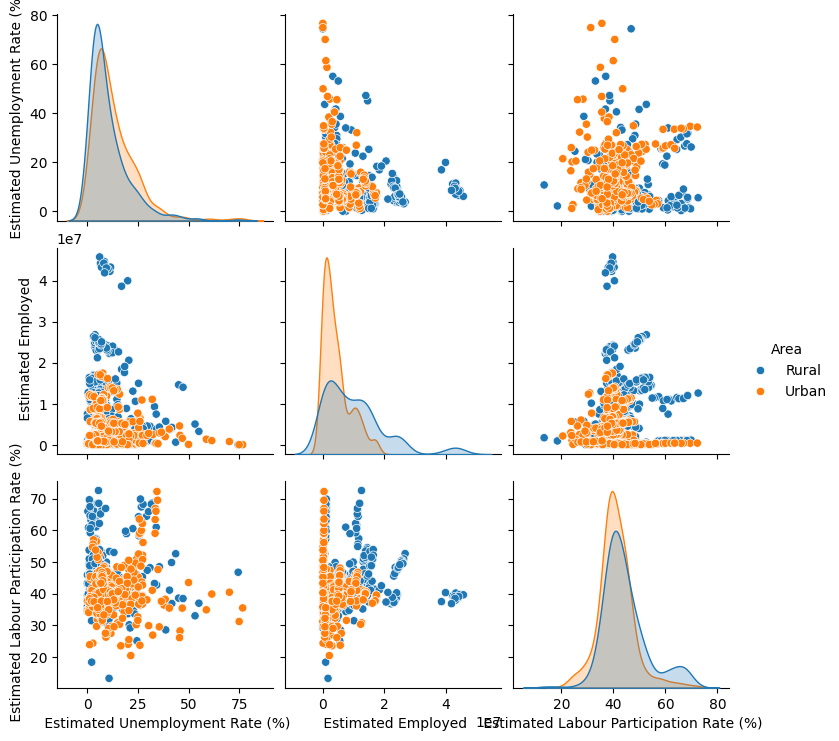

In [64]:
sns.pairplot(df, vars=[' Estimated Unemployment Rate (%)',
                       ' Estimated Employed',
                       ' Estimated Labour Participation Rate (%)'],
             hue='Area')
plt.show()


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score




In [68]:
df['Month'] = df[' Date'].dt.month  # Extract month as a feature
X = df[['Month', ' Estimated Labour Participation Rate (%)']]  # Features
y = df[' Estimated Unemployment Rate (%)']  # Target

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)
print("\nModel Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Model Performance:
Mean Absolute Error: 8.410722816296577
R2 Score: 0.00025861225321921477


<ipython-input-72-82ce48ea4863>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


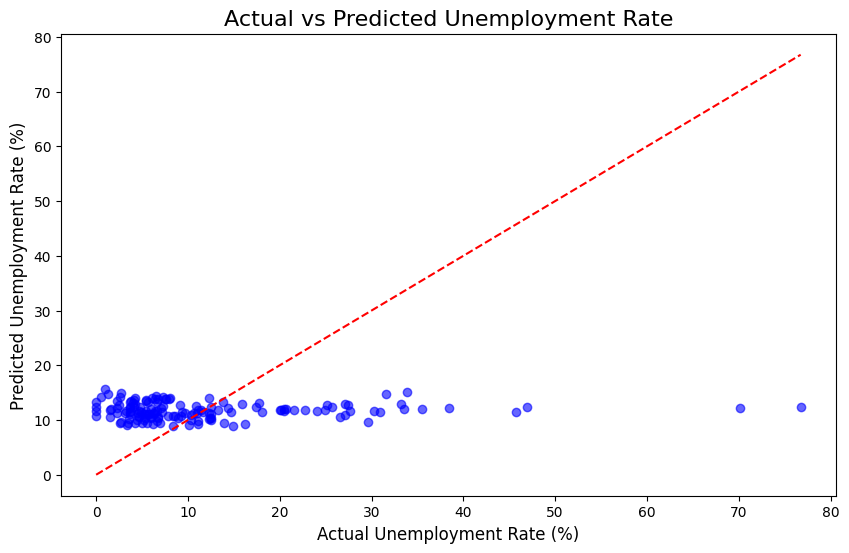

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.title('Actual vs Predicted Unemployment Rate', fontsize=16)
plt.xlabel('Actual Unemployment Rate (%)', fontsize=12)
plt.ylabel('Predicted Unemployment Rate (%)', fontsize=12)
plt.show()